## Basic imports

In [97]:
# Basics Imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# To Avoid warnings
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier



from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.metrics import make_scorer

## Reading dataset

In [69]:
df = pd.read_excel('output_file.xlsx')

In [70]:
pd.set_option('display.max_columns', None)
df.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,4,55,3,2,4,1,No,12,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,4,42,3,2,1,2,No,12,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,4,48,2,3,1,5,Yes,21,3,20,2,3,15,9,1,9,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,2,73,2,4,4,3,No,15,2,23,2,2,15,6,7,6,No,3
4,E1001010,50,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,1,84,3,2,1,7,No,14,4,10,2,3,2,2,2,2,No,3


## Information about data

In [71]:
#shape of the data
df.shape

(1200, 28)

In [72]:
#information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   EmpNumber                     1200 non-null   object
 1   Age                           1200 non-null   int64 
 2   Gender                        1200 non-null   object
 3   EducationBackground           1200 non-null   object
 4   MaritalStatus                 1200 non-null   object
 5   EmpDepartment                 1200 non-null   object
 6   EmpJobRole                    1200 non-null   object
 7   BusinessTravelFrequency       1200 non-null   object
 8   DistanceFromHome              1200 non-null   int64 
 9   EmpEducationLevel             1200 non-null   int64 
 10  EmpEnvironmentSatisfaction    1200 non-null   int64 
 11  EmpHourlyRate                 1200 non-null   int64 
 12  EmpJobInvolvement             1200 non-null   int64 
 13  EmpJobLevel       

In [73]:
# Statistical information about the data
df.describe()

,Age,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,PerformanceRating
count,1200.000000,1200.000000,1200.0000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,36.800000,8.831667,2.8575,2.715833,66.088333,2.696667,2.020833,2.732500,2.566667,15.060000,2.725000,10.942500,2.867500,2.701667,6.425000,4.052500,1.889167,3.910000,2.948333
std,7.808808,7.484429,0.9881,1.090599,19.075825,0.459890,0.998948,1.100888,2.251988,3.289947,1.075642,6.356587,0.999555,0.457717,4.431223,3.093712,2.392694,3.120365,0.518866
min,26.000000,1.000000,1.0000,1.000000,38.000000,2.000000,1.000000,1.000000,0.000000,11.000000,1.000000,3.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,2.000000
25%,30.000000,2.000000,2.0000,2.000000,48.000000,2.000000,1.000000,2.000000,1.000000,12.000000,2.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,3.000000
50%,36.000000,7.000000,3.0000,3.000000,66.000000,3.000000,2.000000,3.000000,2.000000,14.000000,3.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,3.000000
75%,43.000000,14.000000,4.0000,4.000000,83.000000,3.000000,3.000000,4.000000,4.000000,18.000000,4.000000,15.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000,3.000000
max,50.000000,23.000000,4.0000,4.000000,94.000000,3.000000,4.000000,4.000000,7.000000,21.000000,4.000000,23.000000,5.000000,3.000000,15.000000,9.000000,7.000000,9.000000,4.000000


## Checking Null values 

In [74]:
df.isnull().sum()

EmpNumber                       0
Age                             0
Gender                          0
EducationBackground             0
MaritalStatus                   0
EmpDepartment                   0
EmpJobRole                      0
BusinessTravelFrequency         0
DistanceFromHome                0
EmpEducationLevel               0
EmpEnvironmentSatisfaction      0
EmpHourlyRate                   0
EmpJobInvolvement               0
EmpJobLevel                     0
EmpJobSatisfaction              0
NumCompaniesWorked              0
OverTime                        0
EmpLastSalaryHikePercent        0
EmpRelationshipSatisfaction     0
TotalWorkExperienceInYears      0
TrainingTimesLastYear           0
EmpWorkLifeBalance              0
ExperienceYearsAtThisCompany    0
ExperienceYearsInCurrentRole    0
YearsSinceLastPromotion         0
YearsWithCurrManager            0
Attrition                       0
PerformanceRating               0
dtype: int64

# Feature selection and model evaluation

## Train test split
### Stratifed splitting
Stratified splitting means that when you generate a training / validation dataset split, it will attempt to keep the same percentages of classes in each split.

These dataset divisions are usually generated randomly according to a target variable. However, when doing so, the proportions of the target variable among the different splits can differ, especially in the case of small datasets.

In [76]:
X = df.drop(columns=['EmpNumber', 'PerformanceRating'])  
y = df['PerformanceRating'] 

In [77]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [78]:
X_train_numcols = [col for col in X_train.columns if X_train[col].dtype!='object']
X_train_catcols = [col for col in X_train.columns if X_train[col].dtype=='object']

**never mess up with your test set. Always split into test and train sets BEFORE Feature selection, scaling and sampling techniques**
¶

### Scaling features

In [79]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train[X_train_numcols] = scaler.fit_transform(X_train[X_train_numcols])
X_test[X_train_numcols] = scaler.transform(X_test[X_train_numcols])

### Encoding categorical features

In [80]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

for col in X_train_catcols:
    # Fit on training data and transform both training and test data
    X_train[col] = encoder.fit_transform(X_train[col])
    X_test[col] = encoder.transform(X_test[col])

## Feature Selection

In [81]:
X_train_numcols = [col for col in X_train.columns if X_train[col].dtype!='object']
X_train_catcols = [col for col in X_train.columns if X_train[col].dtype=='object']

<Axes: >

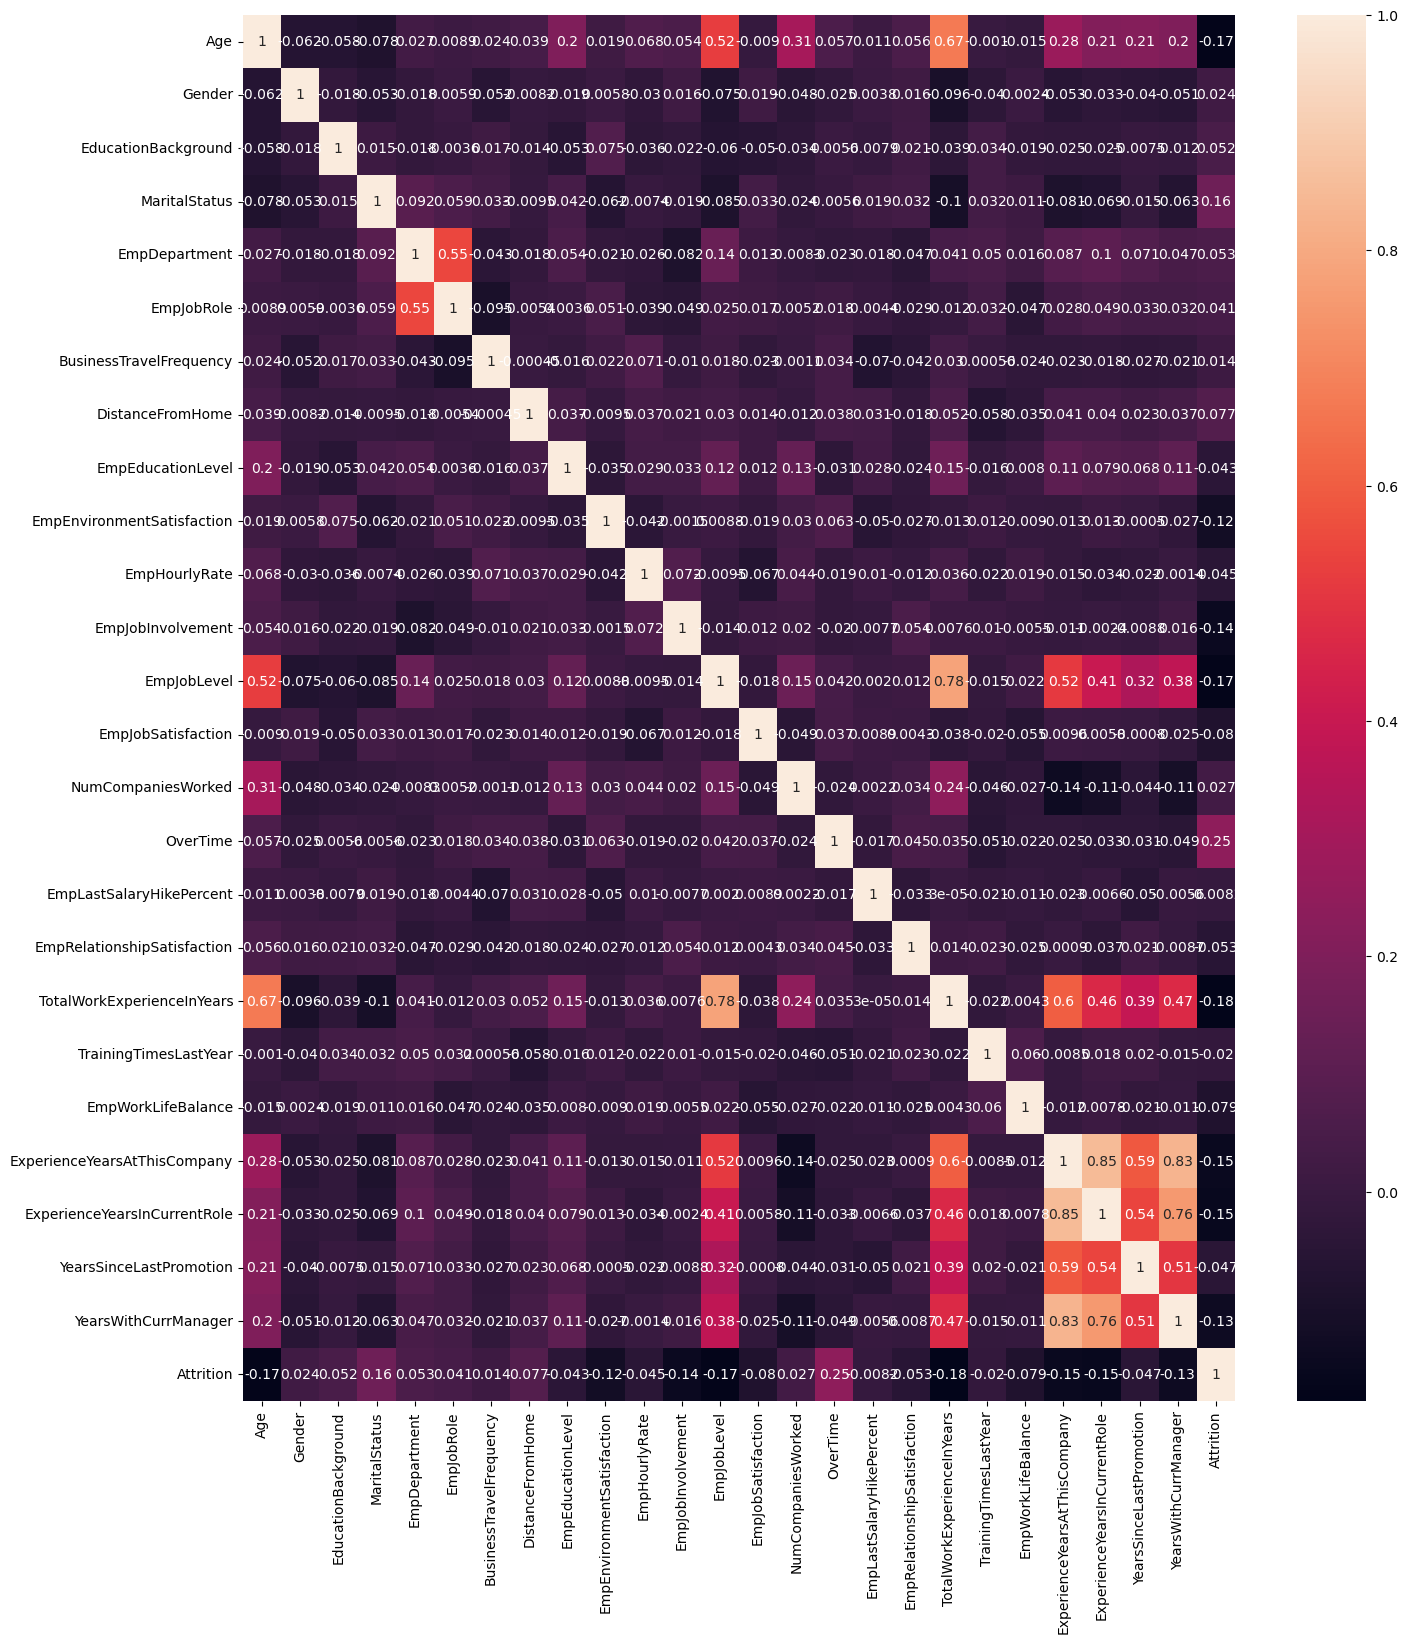

In [82]:
plt.figure(figsize=(16,18))
sns.heatmap(data = X_train[X_train_numcols].corr(), annot = True)

In [83]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything else
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr


In [84]:
corr_features = correlation(X_train[X_train_numcols], 0.8)
corr_features

{'ExperienceYearsInCurrentRole', 'YearsWithCurrManager'}

In [85]:
X_train.drop(corr_features, axis = 1, inplace = True)
X_test.drop(corr_features, axis = 1, inplace = True)

In [86]:
X_train_numcols = [col for col in X_train_numcols if col not in ['ExperienceYearsInCurrentRole', 'YearsWithCurrManager']]


In [87]:
from sklearn.metrics import f1_score

## Recursive feature elimination (RFE)
**Recursive Feature Elimination (RFE)** is a feature selection technique that iteratively removes less relevant features from a model, based on importance scores or weights. It enhances model interpretability, reduces overfitting, and improves performance by focusing on the most informative features. I found this is a better techinique for this dataset, because the dataset is pretty small and this techinique takes less time.
.

In [88]:
rfc = RandomForestClassifier(random_state = 42, class_weight='balanced',  n_jobs=-1)

In [89]:
from sklearn.feature_selection import RFE

rfe_f1_score_list = []

for k in range(1, 25):
    RFE_selector = RFE(estimator=rfc, n_features_to_select=k, step=1)
    RFE_selector.fit(X_train, y_train)
    
    select_X_train = RFE_selector.transform(X_train)
    select_X_test = RFE_selector.transform(X_test)
    
    rfc.fit(select_X_train, y_train)
    RFE_preds = rfc.predict(select_X_test)
    
    f1_score_rfe = round(f1_score(y_test, RFE_preds, average='weighted'), 3)
    
    rfe_f1_score_list.append(f1_score_rfe)

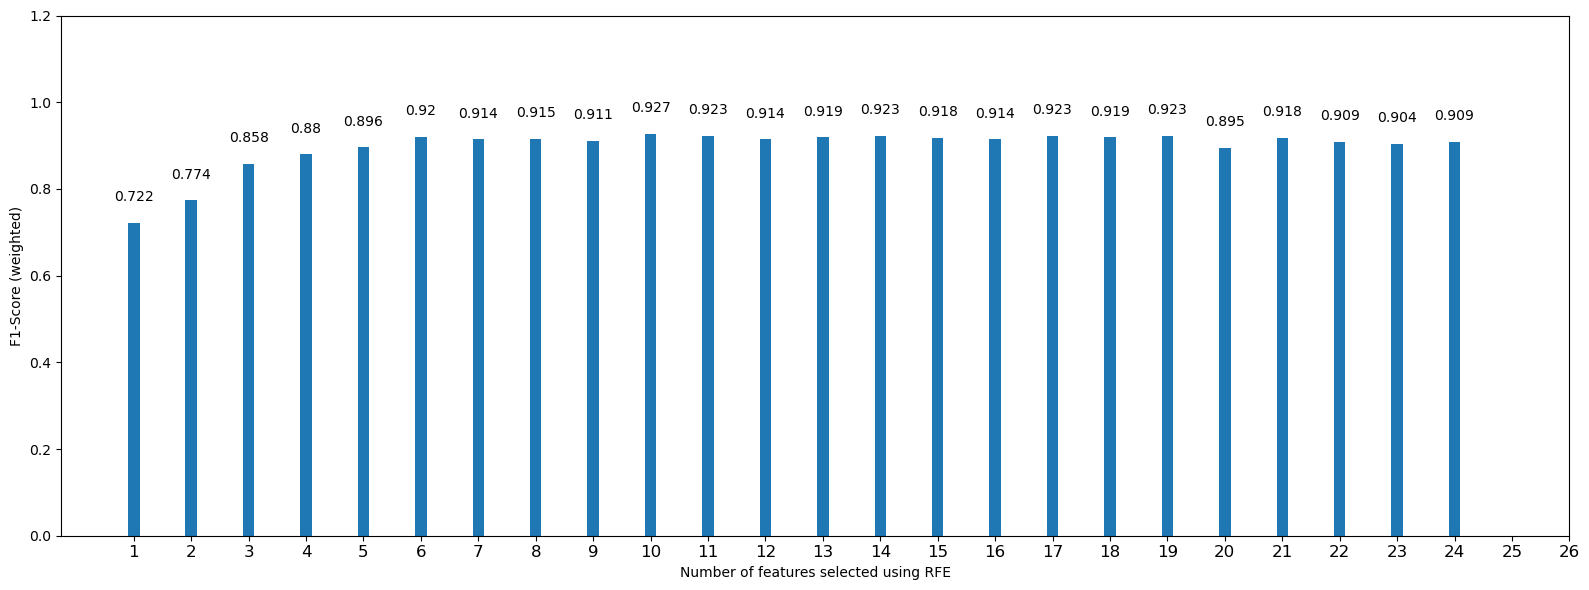

In [90]:
fig, ax = plt.subplots(figsize=(16, 6))  # Adjust the size as needed

x = np.arange(1, 25)
y = rfe_f1_score_list

ax.bar(x, y, width=0.2)
ax.set_xlabel('Number of features selected using RFE')
ax.set_ylabel('F1-Score (weighted)')
ax.set_ylim(0, 1.2)
ax.set_xticks(np.arange(1, 27))
ax.set_xticklabels(np.arange(1, 27), fontsize=12)  # Adjust fontsize as needed

for i, v in enumerate(y):
    plt.text(x=i+1, y=v+0.05, s=str(v), ha='center')
    
plt.tight_layout()
plt.show()


In [91]:
from sklearn.feature_selection import SelectKBest

In [92]:
RFE_selector = RFE(estimator=rfc, n_features_to_select=6, step=10)
RFE_selector.fit(X_train, y_train)

selected_features_mask = RFE_selector.get_support()

selected_features = X_train.columns[selected_features_mask]
selected_features

Index(['EmpJobRole', 'EmpEnvironmentSatisfaction', 'EmpHourlyRate',
       'EmpLastSalaryHikePercent', 'ExperienceYearsAtThisCompany',
       'YearsSinceLastPromotion'],
      dtype='object')

In [93]:
X_train = X_train[selected_features]
X_test = X_test[selected_features]

# Model Evaluation

## Cross validation

Model is not the one that gives accurate predictions on the training data, but the one which gives good predictions on the new data and avoids overfitting and underfitting

Cross-validation is a resampling procedure used to evaluate machine learning models on a limited data sample. The procedure has a single parameter called k that refers to the number of groups that a given data sample is to be split into. As such, the procedure is often called k-fold cross-validation.

The purpose of cross–validation is to test the ability of a machine learning model to predict new data.a**.
ata.

### Stratified K-Fold CV (Cross-Validation)
Stratification is used when the datasets contain unbalanced classes. Therefore if we cross-validate with a normal technique it may produce subsamples that have a varying distribution of classes. Some unbalanced samples may produce exceptionally high scores leading to a high cross-validation score overall, which is undesirable. Therefore we create stratified subsamples that preserve the class frequencies in the individual folds to ensure that we are able to get a clear picture of the model performance.

In [94]:
kf = StratifiedKFold(n_splits=5, shuffle=False)

## Base model (without hyperparameter tuning)

### Balancing data

In [95]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_train_re, y_train_re = smote.fit_resample(X_train, y_train)

In [101]:
y_train_re.value_counts()

PerformanceRating
3    699
2    699
4    699
Name: count, dtype: int64

## Logistic Regression

In [98]:
lr_model = LogisticRegression(multi_class='ovr', max_iter=1000)
lr_model.fit(X_train_re, y_train_re)


LogisticRegression(max_iter=1000, multi_class='ovr')

In [100]:
lr_preds  = lr_model.predict(X_test)

accuracy = round(accuracy_score(y_test, lr_preds) * 100, 2)
print(f"\033[1mAccuracy score : {accuracy} %\n")
print("\033[1mClassification Report\n")
print(classification_report(y_test, lr_preds))


Accuracy score : 67.5 %

Classification Report

              precision    recall  f1-score   support

           2       0.43      0.74      0.55        39
           3       0.91      0.64      0.75       175
           4       0.42      0.81      0.55        26

    accuracy                           0.68       240
   macro avg       0.59      0.73      0.62       240
weighted avg       0.78      0.68      0.70       240



## SVC

In [102]:
svc_model =  SVC(kernel='rbf', C=1.0, gamma='scale')
svc_model.fit(X_train_re, y_train_re)

SVC()

In [103]:
svc_preds  = svc_model.predict(X_test)

accuracy = round(accuracy_score(y_test, svc_preds) * 100, 2)
print(f"\033[1mAccuracy score : {accuracy} %\n")
print("\033[1mClassification Report\n")
print(classification_report(y_test, svc_preds))


Accuracy score : 75.0 %

Classification Report

              precision    recall  f1-score   support

           2       0.52      0.87      0.65        39
           3       0.94      0.72      0.82       175
           4       0.49      0.77      0.60        26

    accuracy                           0.75       240
   macro avg       0.65      0.79      0.69       240
weighted avg       0.82      0.75      0.77       240



## Random Forest Classifier

In [109]:
rf = RandomForestClassifier()
rf.fit(X_train_re,y_train_re)
rf_preds = rf.predict(X_test)

In [110]:
accuracy = round(accuracy_score(y_test, rf_preds) * 100, 2)
print(f"\033[1mAccuracy score : {accuracy} %\n")
print("\033[1mClassification Report\n")
print(classification_report(y_test, rf_preds))


Accuracy score : 92.92 %

Classification Report

              precision    recall  f1-score   support

           2       0.83      0.87      0.85        39
           3       0.94      0.97      0.95       175
           4       1.00      0.77      0.87        26

    accuracy                           0.93       240
   macro avg       0.92      0.87      0.89       240
weighted avg       0.93      0.93      0.93       240



# Gradientboost Classifier

In [113]:
g_boost = GradientBoostingClassifier()
g_boost.fit(X_train_re, y_train_re)
g_preds = rf.predict(X_test)

In [114]:
accuracy = round(accuracy_score(y_test, g_preds) * 100, 2)
print(f"\033[1mAccuracy score : {accuracy} %\n")
print("\033[1mClassification Report\n")
print(classification_report(y_test, g_preds))


Accuracy score : 92.92 %

Classification Report

              precision    recall  f1-score   support

           2       0.83      0.87      0.85        39
           3       0.94      0.97      0.95       175
           4       1.00      0.77      0.87        26

    accuracy                           0.93       240
   macro avg       0.92      0.87      0.89       240
weighted avg       0.93      0.93      0.93       240



# Hyperparameter Tuning 

### Sampling is not recommanded before Cross validation


If you want to undersample or oversample your data you shouldn't do it before cross validating because you will be directly influencing the validation set before implementing cross-validation causing a "data leakage" problem.

Exactly like we should do feature selection inside the cross validation loop, we should also oversample inside the loop.



###  Hyperparameter Tuning Using GridSearchCV(RandomForest Classifier)

In [115]:
#We are going to ensure that we have the same splits of the data every time. 
#We can ensure this by creating a KFold object, kf, and passing cv=kf instead of the more common cv=5.

kf = StratifiedKFold(n_splits=5, shuffle=False)

In [116]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [4, 6, 10, 12],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}


## Imbalanced-Learn Pipeline

The purpose of the pipeline is to assemble several steps that can be cross-validated together while setting different parameters.

During the cross-validation process we should split into training and validation segments. Then, on each segment, we should:

1.Oversamplee the inorityy class.
2. Train the classifier on the training segment.
3. Validate the classifier on the remaining segment.

In [117]:
from imblearn.pipeline import Pipeline, make_pipeline
oversample_pipeline = make_pipeline(SMOTE(), 
                              RandomForestClassifier(random_state=13))

In [118]:
new_params = {'randomforestclassifier__' + key: param_grid[key] for key in param_grid}
scorer = make_scorer(f1_score, average='weighted')

grid_over_rf = GridSearchCV(oversample_pipeline, param_grid=new_params, cv=kf, scoring=scorer,
                            return_train_score=True)
grid_over_rf.fit(X_train, y_train)


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('smote', SMOTE()),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(random_state=13))]),
             param_grid={'randomforestclassifier__max_depth': [4, 6, 10, 12],
                         'randomforestclassifier__min_samples_leaf': [1, 2, 4],
                         'randomforestclassifier__min_samples_split': [2, 5,
                                                                       10],
                         'randomforestclassifier__n_estimators': [50, 100,
                                                                  200]},
             return_train_score=True,
             scoring=make_scorer(f1_score, average=weighted))

In [119]:
best_rf_estimator = grid_over_rf.best_estimator_
feature_importances = best_rf_estimator.named_steps['randomforestclassifier'].feature_importances_

In [120]:
for feature_name, importance in zip(X_train.columns, feature_importances):
    print(f"Feature: {feature_name}, Importance: {importance}")

Feature: EmpJobRole, Importance: 0.07451339095378177
Feature: EmpEnvironmentSatisfaction, Importance: 0.31502240033429546
Feature: EmpHourlyRate, Importance: 0.04958362207658271
Feature: EmpLastSalaryHikePercent, Importance: 0.3296028112651568
Feature: ExperienceYearsAtThisCompany, Importance: 0.06152130558345802
Feature: YearsSinceLastPromotion, Importance: 0.16975646978672523


In [121]:
print('Best parameters:', grid_over_rf.best_params_)
print('Best score:', grid_over_rf.best_score_)

Best parameters: {'randomforestclassifier__max_depth': 12, 'randomforestclassifier__min_samples_leaf': 1, 'randomforestclassifier__min_samples_split': 5, 'randomforestclassifier__n_estimators': 100}
Best score: 0.9142372242590501


In [122]:
y_pred = grid_over_rf.best_estimator_.named_steps['randomforestclassifier'].predict(X_test)

In [123]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           2       0.82      0.85      0.84        39
           3       0.94      0.97      0.95       175
           4       1.00      0.77      0.87        26

    accuracy                           0.93       240
   macro avg       0.92      0.86      0.89       240
weighted avg       0.93      0.93      0.92       240



In [124]:
confusion_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')


In [125]:
print("Confusion Matrix:")
print(confusion_matrix)

print("\nRecall Score:", recall)

print("Precision:", precision)

print("F1 Score:", f1)

print("Accuracy:", accuracy)

Confusion Matrix:
[[ 33   6   0]
 [  6 169   0]
 [  1   5  20]]

Recall Score: 0.925
Precision: 0.9270023148148148
F1 Score: 0.9242112185126904
Accuracy: 0.925


# Recommendations to improve the employee performance

1. The overall performance of employees is closely tied to how satisfied they are with their workplace environment. Focusing on enhancing environment satisfaction can lead to better performance across the board.

2. Giving employees salary hikes not only improves their financial situation but also boosts their motivation and morale. This, in turn, can lead to improved performance both financially and emotionally.

3. Offering promotions to employees not only recognizes their hard work but also provides them with opportunities to grow. This can lead to better performance as employees take on more responsibilities and develop leadership skills.

4. When hiring new employees, it's important to rethink the significance of their experience in their current role. This ensures that new hires are placed in positions that suit their skills and expertise, ultimately improving their performance.

5. Employee performance ratings are greatly influenced by their work-life balance. Prioritizing a healthy balance between work and personal life can lead to better performance outcomes.
ance outcomes.
ance outcomes.
